# San Francisco bike sharing system
## by Javier Alonso

## Preliminary Wrangling

Esto es una prueba para GIT



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### GATHERING DATA

>In this section I will gather data from all the files available from years 2018 and 2019

> First, I import the 2019 data

In [2]:
df_1901 = pd.read_csv('201901-fordgobike-tripdata.csv')
df_1902 = pd.read_csv('201902-fordgobike-tripdata.csv')
df_1903 = pd.read_csv('201903-fordgobike-tripdata.csv')
df_1904 = pd.read_csv('201904-fordgobike-tripdata.csv')
df_1905 = pd.read_csv('201905-baywheels-tripdata.csv')
#in 201906, 201907, 201911, 201912 they one more column that I delete "rental_access_method", as I don´t need it
df_1906 = pd.read_csv('201906-baywheels-tripdata.csv')
df_1906 = df_1906.drop(columns=['rental_access_method'])
df_1907 = pd.read_csv('201907-baywheels-tripdata.csv')
df_1907 = df_1907.drop(columns=['rental_access_method'])
df_1908 = pd.read_csv('201908-baywheels-tripdata.csv')
df_1909 = pd.read_csv('201909-baywheels-tripdata.csv')
df_1910 = pd.read_csv('201910-baywheels-tripdata.csv')
df_1911 = pd.read_csv('201911-baywheels-tripdata.csv')
df_1911 = df_1911.drop(columns=['rental_access_method'])
#for december 2019 there are two formats in the file. I had to divide it and import separately
#the first pack follows the same rules as the one before
df_191201 = pd.read_csv('20191201-baywheels-tripdata.csv')
df_191201 = df_191201.drop(columns=['rental_access_method'])
#the second pack has two more columns. I had to include two more titles in the csv and after importing, delete those two columns
df_191202 = pd.read_csv('20191202-baywheels-tripdata.csv',header=0)
df_191202 = df_191202.drop(columns=['A1', 'A2','rental_access_method'])

C:\Users\Telu Teruno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Telu Teruno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


> I append all the 2019 dataframes and check if the total number of rows are the same after the append. If the result is true, the append action is correct

In [3]:
df_19 = df_1901.append([df_1902,df_1903,df_1904,df_1905,df_1906,df_1907,df_1908,df_1909,df_1910,df_1911,df_191201,df_191202])

In [4]:
df_19.shape[0]==df_1901.shape[0]+df_1902.shape[0]+df_1903.shape[0]+df_1904.shape[0]+df_1905.shape[0]+df_1906.shape[0]+df_1907.shape[0]+df_1908.shape[0]+df_1909.shape[0]+df_1910.shape[0]+df_1911.shape[0]+df_191201.shape[0]+df_191202.shape[0]

True

> I do the same with the 2018 dataframe

In [5]:
df_1801 = pd.read_csv('201801-fordgobike-tripdata.csv')
df_1802 = pd.read_csv('201802-fordgobike-tripdata.csv')
df_1803 = pd.read_csv('201803-fordgobike-tripdata.csv')
df_1804 = pd.read_csv('201804-fordgobike-tripdata.csv')
df_1805 = pd.read_csv('201805-fordgobike-tripdata.csv')
df_1806 = pd.read_csv('201806-fordgobike-tripdata.csv')
df_1807 = pd.read_csv('201807-fordgobike-tripdata.csv')
df_1808 = pd.read_csv('201808-fordgobike-tripdata.csv')
df_1809 = pd.read_csv('201809-fordgobike-tripdata.csv')
df_1810 = pd.read_csv('201810-fordgobike-tripdata.csv')
df_1811 = pd.read_csv('201811-fordgobike-tripdata.csv')
df_1812 = pd.read_csv('201812-fordgobike-tripdata.csv')

In [6]:
df_18 = df_1801.append([df_1802,df_1803,df_1804,df_1805,df_1806,df_1807,df_1808,df_1809,df_1810,df_1811,df_1812])

In [7]:
df_18.shape[0]==df_1801.shape[0]+df_1802.shape[0]+df_1803.shape[0]+df_1804.shape[0]+df_1805.shape[0]+df_1806.shape[0]+df_1807.shape[0]+df_1808.shape[0]+df_1809.shape[0]+df_1810.shape[0]+df_1811.shape[0]+df_1812.shape[0]

True

> I append both dataframes so I have my final dataframe for years 2018 and 2019

In [8]:
df = df_18.append(df_19)

In [9]:
df.shape[0]==df_18.shape[0]+df_19.shape[0]

True

> For checking it has been imported correctly I do some visualization of data

In [10]:
df.shape

(4370704, 14)

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [12]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
5374,270,2018-11-30 07:39:09.8910,2018-11-30 07:43:40.6160,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,1976,Subscriber,No
4339,527,2019-01-31 16:02:43.7370,2019-01-31 16:11:31.0170,317.0,San Salvador St at 9th St,37.333955,-121.877349,280.0,San Fernando St at 7th St,37.337122,-121.883215,4225,Subscriber,Yes
53063,555,2019-12-14 12:14:42.5250,2019-12-14 12:23:58.1010,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,105.0,16th St at Prosper St,37.764285,-122.431804,9753,Customer,No
140048,1233,2019-03-15 17:24:37.1000,2019-03-15 17:45:11.0120,66.0,3rd St at Townsend St,37.778742,-122.392741,377.0,Fell St at Stanyan St,37.771917,-122.453704,6083,Subscriber,No
68626,988,2019-03-23 17:35:39.4260,2019-03-23 17:52:07.6710,31.0,Raymond Kimbell Playground,37.783813,-122.434559,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,5345,Subscriber,No


## ASESSING AND CLEANING DATA

> After gathering each of the above pieces of data, I´ve assessed them visually and programmatically for quality and tidiness issues, and clean the issues

> First thing I do a copy of my dataframe


In [13]:
df_clean = df.copy()

### Tidiness issues

> The tidiness issue has been discovered through visual assesement, looking at the head() and sample() results visualized above

> 1 The info of the stations id, names, latitudes and longitudes is redundant. (Visual assessment)

> Solution: I´m going to create a new table with the data of the stations, and drop those columns from the general dataframe


In [14]:
#I create the new df for the start stations
df_start_station = df.copy()
df_start_station = df_start_station.drop(['duration_sec','start_time', 'end_time','end_station_id', 'end_station_name','end_station_latitude','end_station_longitude','bike_id','user_type','bike_share_for_all_trip'], axis=1)
df_start_station.drop_duplicates(inplace = True)
df_start_station.rename(columns={"start_station_id": "id", "start_station_name": "name", "start_station_latitude": "latitude", "start_station_longitude": "longitude"}, inplace = True)

In [15]:
#I create the new df for the end stations
df_end_station = df.copy()
df_end_station = df_end_station.drop(['duration_sec','start_time', 'end_time','start_station_id', 'start_station_name','start_station_latitude','start_station_longitude','bike_id','user_type','bike_share_for_all_trip'], axis=1)
df_end_station.drop_duplicates(inplace = True)
df_end_station.rename(columns={"end_station_id": "id", "end_station_name": "name", "end_station_latitude": "latitude", "end_station_longitude": "longitude"}, inplace = True)

In [16]:
#I put together both dfs and remove duplicates
df_station = df_start_station.append(df_end_station)
df_station.drop_duplicates(inplace = True)
#there are some duplicates of id. As I don´t know what´s the correct info I just keep one of them
df_station.drop_duplicates(subset ="id",inplace = True)
#there´s also a Nan, that I have to drop
df_station = df_station.dropna()

In [17]:
#I drop the columns from the original dataframe
df_clean = df_clean.drop([ 'start_station_name','start_station_latitude','start_station_longitude','end_station_name','end_station_latitude','end_station_longitude'], axis=1)


> Now we can see how were set finally both dataframes

In [18]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 54597
Data columns (total 4 columns):
id           444 non-null float64
name         444 non-null object
latitude     444 non-null float64
longitude    444 non-null float64
dtypes: float64(3), object(1)
memory usage: 17.3+ KB


In [19]:
df_station.head()

,id,name,latitude,longitude
0,120.0,Mission Dolores Park,37.761420,-122.426435
1,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203
2,304.0,Jackson St at 5th St,37.348759,-121.894798
3,75.0,Market St at Franklin St,37.773793,-122.421239
4,74.0,Laguna St at Hayes St,37.776435,-122.426244


In [20]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,285.0,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,15.0,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,296.0,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,47.0,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,19.0,617,Subscriber,No



> 2 The info of duration and start and end time is redundant, as the duration is the difference between both times  (Visual assessment)

> Solution: I´m going to delete the end time column as it is redundant



In [21]:
df_clean = df_clean.drop(['end_time'], axis=1)

In [22]:
df_clean.head()

,duration_sec,start_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,120.0,285.0,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,15.0,15.0,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,304.0,296.0,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,75.0,47.0,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,74.0,19.0,617,Subscriber,No


### Quality issues

> For asessing programatically I´ve used functions like describe(), info(), nunique(), head(), value_counts(),... The issues discovered are the next:

> 1 df: incorrect datatype of the field: start_time


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370704 entries, 0 to 27680
Data columns (total 7 columns):
duration_sec               int64
start_time                 object
start_station_id           float64
end_station_id             float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(2), int64(2), object(3)
memory usage: 266.8+ MB


> Solution: change the datatype of the field

In [24]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370704 entries, 0 to 27680
Data columns (total 7 columns):
duration_sec               int64
start_time                 datetime64[ns]
start_station_id           float64
end_station_id             float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 266.8+ MB


> 2 df: There is a lot of poor quality information in bike_share_for_all_trip column and we are not going to use that field in our analysis

In [26]:
df_clean.isnull().sum()

duration_sec                    0
start_time                      0
start_station_id            92505
end_station_id              94673
bike_id                         0
user_type                       0
bike_share_for_all_trip    101066
dtype: int64

> Solution: drop the column

In [27]:
df_clean = df_clean.drop(['bike_share_for_all_trip'], axis=1)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370704 entries, 0 to 27680
Data columns (total 6 columns):
duration_sec        int64
start_time          datetime64[ns]
start_station_id    float64
end_station_id      float64
bike_id             int64
user_type           object
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 233.4+ MB


> 3 df: there are a lot of NaNs in station ids

In [29]:
df_clean.isnull().sum()

duration_sec            0
start_time              0
start_station_id    92505
end_station_id      94673
bike_id                 0
user_type               0
dtype: int64

> Solution: We could drop the rows with NaNs, or find another solution, but as my analysis is not going to be about the stations I´ll leave the rows with the NaNs

### Engineering issues

> Actions for modifiying actual data or create new one from the actual for a better analysis

> 1 df: the duration in seconds has high numbers and it´s not understandable at first view, so I´m going to change it to minutes

In [30]:
df_clean.head()

,duration_sec,start_time,start_station_id,end_station_id,bike_id,user_type
0,75284,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber
1,85422,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer
2,71576,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer
3,61076,2018-01-31 14:53:23.562,75.0,47.0,321,Customer
4,39966,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber


> Solution: create a new column with the data in minutes and drop the one in seconds

In [31]:
df_clean['duration_min'] = round(df_clean['duration_sec'] / 60,2)
df_clean = df_clean.drop(['duration_sec'], axis=1)

In [32]:
df_clean.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10


> 2 The start time is very complete (until centesimals of secs) and we need to extract info of day, month and day of the week from there

> Solution: add this new columns

> For day of the week I get the values of 1 for Monday, 2 for Tuesday,... until 7 for Sunday, and the month appears as the first day of the month

In [42]:
df_clean['date'] = df_clean['start_time'].dt.strftime('%Y/%m/%d')
df_clean['month'] = df_clean['start_time'].dt.strftime('%Y/%m')
df_clean['day_week'] = df_clean['start_time'].dt.dayofweek+1

In [49]:
df_clean.date = pd.to_datetime(df_clean.date, format='%Y/%m/%d')
df_clean.month = pd.to_datetime(df_clean.month, format='%Y/%m')

In [50]:
df_clean.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,date,month,day_week
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73,2018-01-31,2018-01-01,3
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70,2018-01-31,2018-01-01,3
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93,2018-01-31,2018-01-01,3
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93,2018-01-31,2018-01-01,3
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10,2018-01-31,2018-01-01,3


In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370704 entries, 0 to 27680
Data columns (total 9 columns):
start_time          datetime64[ns]
start_station_id    float64
end_station_id      float64
bike_id             int64
user_type           object
duration_min        float64
date                datetime64[ns]
month               datetime64[ns]
day_week            int64
dtypes: datetime64[ns](3), float64(3), int64(2), object(1)
memory usage: 333.5+ MB


### Consolidation of dataframes

> In this section I´m going to consolidate both dataframes into files, that I´ll read for the next sections

In [52]:
df_clean.to_csv('2018-19-bike-tripdata.csv', index = False)
df_station.to_csv('2018-19-bike-stations-data.csv', index = False)

## Univariate Exploration

> In this section, I´ll investigate the distributions of individual variables. 

> I won´t investigate the columns of stations and bike ids, as they are just identifiers, and its value in a univariate exploration doesn´t make sense

> First I´ll import the data stored previously in files

In [53]:
df_trips = pd.read_csv('2018-19-bike-tripdata.csv')
df_stations = pd.read_csv('2018-19-bike-stations-data.csv')

In [58]:
#due to importing issues I change the format of date and month
df_trips.start_time = pd.to_datetime(df_trips.start_time)
df_trips.date = pd.to_datetime(df_trips.date, format='%Y/%m/%d')
df_trips.month = pd.to_datetime(df_trips.month, format='%Y/%m')

In [59]:
df_trips.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,date,month,day_week
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73,2018-01-31,2018-01-01,3
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70,2018-01-31,2018-01-01,3
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93,2018-01-31,2018-01-01,3
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93,2018-01-31,2018-01-01,3
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10,2018-01-31,2018-01-01,3


In [60]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370704 entries, 0 to 4370703
Data columns (total 9 columns):
start_time          datetime64[ns]
start_station_id    float64
end_station_id      float64
bike_id             int64
user_type           object
duration_min        float64
date                datetime64[ns]
month               datetime64[ns]
day_week            int64
dtypes: datetime64[ns](3), float64(3), int64(2), object(1)
memory usage: 300.1+ MB


In [63]:
df_stations.head()

,id,name,latitude,longitude
0,120.0,Mission Dolores Park,37.761420,-122.426435
1,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203
2,304.0,Jackson St at 5th St,37.348759,-121.894798
3,75.0,Market St at Franklin St,37.773793,-122.421239
4,74.0,Laguna St at Hayes St,37.776435,-122.426244


In [64]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
id           444 non-null float64
name         444 non-null object
latitude     444 non-null float64
longitude    444 non-null float64
dtypes: float64(3), object(1)
memory usage: 14.0+ KB


### Variable 1: Duration of ride

In [65]:
df_trips.duration_min.describe()

count    4.370704e+06
mean     1.381369e+01
std      3.587473e+01
min      1.000000e+00
25%      5.920000e+00
50%      9.400000e+00
75%      1.468000e+01
max      1.520183e+04
Name: duration_min, dtype: float64

In [67]:
df_trips.duration_min.sort_values()

4220483        1.00
3361756        1.00
3352209        1.00
3348039        1.00
3285151        1.00
             ...   
3129388     1436.95
4249258     1437.17
1305040     1438.02
187716      1439.43
4344997    15201.83
Name: duration_min, Length: 4370704, dtype: float64

> There´s an outlier of 15201.83 minutes (around 10 days) that must be due to an error or incidence

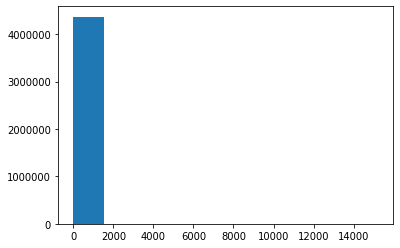

In [68]:
plt.hist(data = df_trips, x = 'duration_min');

> I can see there are some outliers that don´t allow me to see correctly the histogram. I´ll zoom it

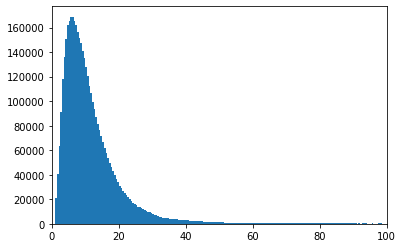

In [70]:
bin_edges = np.arange(0, df_trips['duration_min'].max()+0.5, 0.5)
plt.hist(data = df_trips, x = 'duration_min', bins = bin_edges);
plt.xlim(0, 100);

> The duration of the ride looks like a normal distribution but highly right skewed, that means that we will have to apply the log transformation to it. Most of the rides are of one hour or less

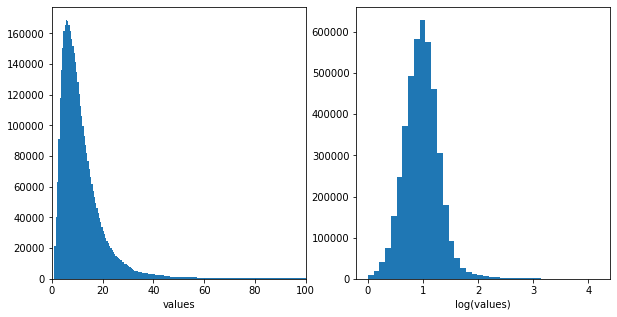

In [71]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_trips['duration_min'].max()+0.5, 0.5)
plt.hist(data = df_trips, x = 'duration_min', bins = bin_edges);
plt.xlim(0, 100);
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df_trips['duration_min']) # direct data transform
plt.hist(log_data, bins = 40);
plt.xlabel('log(values)');

> The log transformation has worked well and now it looks like more likea normal distribution

### Variable 2: Day of the ride

> I´m going to check just the date, and not the day of the week and month, as these variables are dependent to the date, and just included on the dataframe for the multivariate analysis

In [75]:
df_trips[df_trips.date == 0]

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,date,month,day_week


(array([736695., 736785., 736876., 736968., 737060., 737150., 737241.,
        737333., 737425.]), <a list of 9 Text xticklabel objects>)

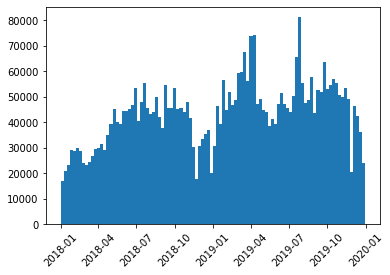

In [78]:
plt.hist(data = df_trips, x = 'date', bins = 100);
plt.xticks(rotation='45')

> The graph is bimodal, number of rides increase in the middle of each year and decrease a lot at the end and beggining of it. In 2019 there are some peaks of usage

### Variable 3: User Type

In [79]:
df_trips.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,date,month,day_week
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73,2018-01-31,2018-01-01,3
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70,2018-01-31,2018-01-01,3
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93,2018-01-31,2018-01-01,3
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93,2018-01-31,2018-01-01,3
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10,2018-01-31,2018-01-01,3


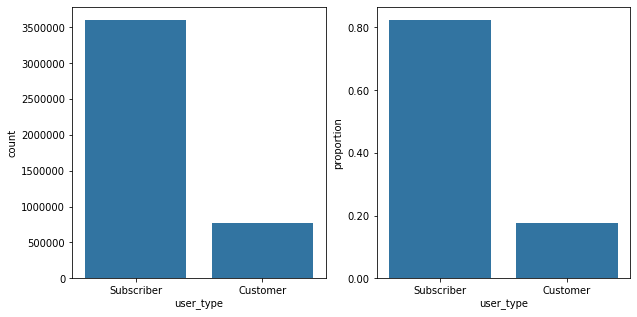

In [80]:
plt.figure(figsize = [10, 5])

# left histogram: user types in absolute numbers
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = df_trips, x = 'user_type', color = base_color);

# Right histogram: user types in relative frequencies
# get proportion taken by most common group for derivation
# of tick marks
n_points = df_trips.shape[0]
max_count = df_trips['user_type'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.countplot(data = df_trips, x = 'user_type', color = base_color);
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');



> More than 80% of the rides are done by subscribers

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my data.

> My objective is try to relate the duration and the number of trips to the month and day of the week

### Duration vs Date

> Let´s see the dependency of the duration of the rides with the date for having a general view of its behaviour, as we are just going to focus on the relationship with month and day of the week

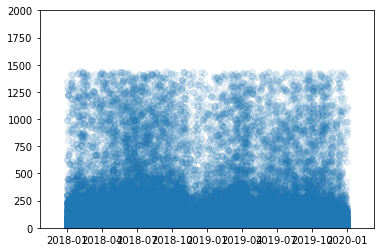

In [83]:
plt.scatter(data = df_trips, x = 'date', y = 'duration_min', alpha = 1/10)
plt.ylim(0, 2000);

> In this scatter plot, due to the huge amount of data is difficult to get conclusions, but we can see there´s not too much correlation between both variables, as it seems the behavior of the duration it´s similar over the two years

### Duration vs Month

> Let´s see the dependency of the duration of the rides with the month of the ride

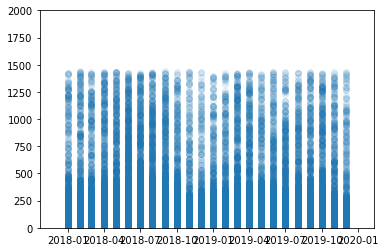

In [87]:
plt.scatter(data = df_trips, x = 'month', y = 'duration_min', alpha = 1/10)
plt.ylim(0, 2000);

> There are differences but it´s not possible to get a pattern. Let´s plot the average duration per month to see what happens

In [88]:
df_trips_avg_dur = df_trips.groupby('month').mean()['duration_min'].to_frame()
df_trips_avg_dur.reset_index(level=0, inplace=True)
df_trips_avg_dur.columns = ['month', 'avg_duration_min']
df_trips_avg_dur

,month,avg_duration_min
0,2018-01-01,14.515603
1,2018-02-01,14.644357
2,2018-03-01,14.510820
3,2018-04-01,14.765474
4,2018-05-01,14.248408
5,2018-06-01,15.129144
6,2018-07-01,15.128504
7,2018-08-01,14.517548
8,2018-09-01,14.668802
9,2018-10-01,13.419798


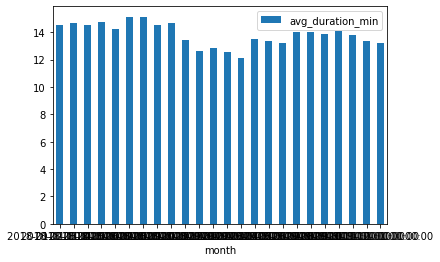

In [89]:
df_trips_avg_dur.plot.bar(x='month', y='avg_duration_min', rot=0)

> The average duration per month vary from 12.1 to 15.13, being the biggest difference 3 minutes. Altough there´s a relationship and the average duration varies per month the difference is not very big, so we can say there´s no importan correspondence between duration and month

### Duration vs Day of the week

> Let´s see the dependency of the duration of the rides with the day of the week of the ride

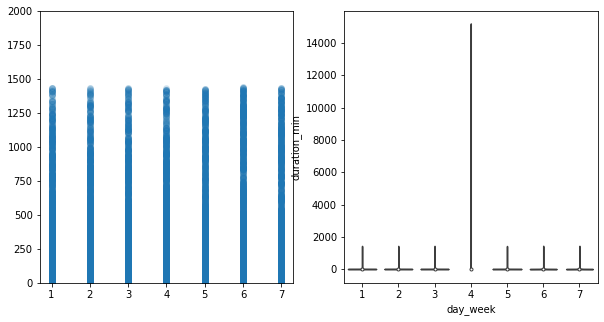

In [103]:
plt.figure(figsize = [10, 5])

# left scatter plot
plt.subplot(1, 2, 1)
plt.scatter(data = df_trips, x = 'day_week', y = 'duration_min', alpha = 1/10)
plt.ylim(0, 2000);

# left violin plots
plt.subplot(1, 2, 2)
sb.violinplot(data = df_trips, x = 'day_week', y = 'duration_min')

> There are differences but it´s not possible to get a pattern in both scatter and violin plots. In violin plots there´s a great difference on thursday but it seems due to outliers or errors

> I´m going to plot the average duration per day of the week and see if we can get something clearer

In [92]:
df_trips_avg_dur_dw = df_trips.groupby('day_week').mean()['duration_min'].to_frame()
df_trips_avg_dur_dw.reset_index(level=0, inplace=True)
df_trips_avg_dur_dw.columns = ['day_week', 'avg_duration_min']
df_trips_avg_dur_dw

,day_week,avg_duration_min
0,1,12.831439
1,2,12.508965
2,3,12.551884
3,4,12.693058
4,5,13.330749
5,6,18.636809
6,7,18.621779


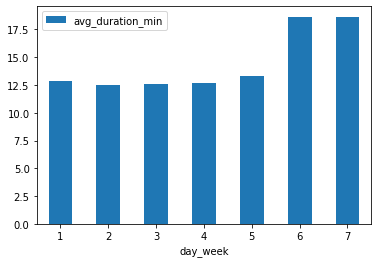

In [93]:
df_trips_avg_dur_dw.plot.bar(x='day_week', y='avg_duration_min', rot=0)

> Here we can see there´s a lot of difference between the average duration during the weekend than the rest of the days of the week, so we keep this relationship for further analysis

### Number of trips vs Month

> Let´s see the dependency of the number of trips with date. We saw on the univariate exploration of the date that the graph is bimodal, number of rides increase in the middle of each year and decrease a lot at the end and beggining of it. In 2019 there are some peaks of usage, but we want to see it better plotting the number of trips against the month

(array([736695., 736785., 736876., 736968., 737060., 737150., 737241.,
        737333., 737425.]), <a list of 9 Text xticklabel objects>)

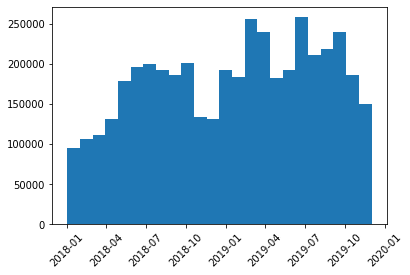

In [96]:
plt.hist(data = df_trips, x = 'month', bins = 24);
plt.xticks(rotation='45');

> This confirms the prior plot with its bimodal behaviour

### Number of trips vs Day of the week

> Let´s see the dependency of the number of trips with the day of the week

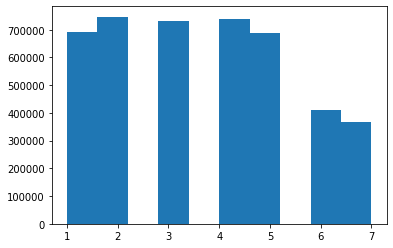

In [98]:
plt.hist(data = df_trips, x = 'day_week');
# plt.xticks(rotation='45')

> Clearly the number of trips descend during the weekend, so the relationship is clear

#### Conclussions

> We´ve seen the next correlations:

>- The duration of the trip depends on the day of the week

>- The number of trips depend on the day of the week and the month

## Multivariate Exploration

> In this part I´m going to add the variable type of user against the three already proved relationships

### Duration vs Weekday vs User

> We´re going to certify that there´s a relationship between duration of the trip, the weekday and the type of user

> As we could see before the information is not clear throuth pure scatter and violin plots, so we´re going to calculate the averages


In [104]:
df_trips.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,date,month,day_week
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73,2018-01-31,2018-01-01,3
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70,2018-01-31,2018-01-01,3
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93,2018-01-31,2018-01-01,3
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93,2018-01-31,2018-01-01,3
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10,2018-01-31,2018-01-01,3


In [109]:
df_trips_subs =  df_trips[df_trips.user_type == 'Subscriber'][['user_type', 'duration_min','day_week']]
df_trips_subs_dur_usr = df_trips_subs.groupby('day_week').mean()['duration_min'].to_frame()
df_trips_subs_dur_usr.reset_index(level=0, inplace=True)
df_trips_subs_dur_usr.columns = ['day_week', 'duration_min']
df_trips_subs_dur_usr

,day_week,duration_min
0,1,10.946195
1,2,10.862461
2,3,10.951323
3,4,10.927581
4,5,11.088346
5,6,12.698212
6,7,12.720300


In [110]:
df_trips_cust =  df_trips[df_trips.user_type == 'Customer'][['user_type', 'duration_min','day_week']]
df_trips_cust_dur_usr = df_trips_cust.groupby('day_week').mean()['duration_min'].to_frame()
df_trips_cust_dur_usr.reset_index(level=0, inplace=True)
df_trips_cust_dur_usr.columns = ['day_week', 'duration_min']
df_trips_cust_dur_usr

,day_week,duration_min
0,1,23.936495
1,2,22.780600
2,3,22.442992
3,4,23.011746
4,5,24.221834
5,6,32.087017
6,7,32.368321


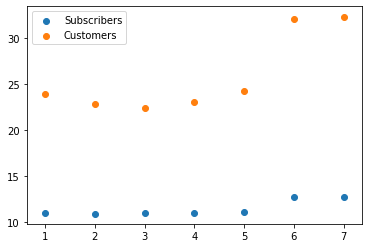

In [114]:
plt.scatter(data = df_trips_subs_dur_usr, x = 'day_week', y = 'duration_min',label = 'Subscribers')
plt.scatter(data = df_trips_cust_dur_usr, x = 'day_week', y = 'duration_min', label = 'Customers')
plt.legend()


> Clearly there´s a difference between both type of users, having higher durations the trips of customers. In both cases the trips are longer during the weekend.

### Number of trips vs Month vs User

> We´re going to certify that there´s a relationship between duration of the trip, the month and the type of user

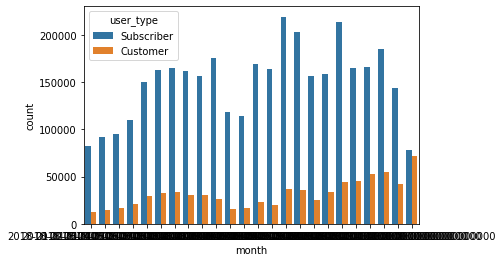

In [116]:
sb.countplot(data = df_trips, x = 'month', hue = 'user_type')

> We can see the number of trips is much higher for subscribers than costumers. 

### Number of trips vs Weekday vs User

> We´re going to certify that there´s a relationship between duration of the trip, the weekday and the type of user


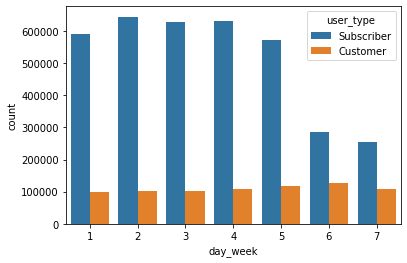

In [115]:
sb.countplot(data = df_trips, x = 'day_week', hue = 'user_type')

> We can see the number of trips is much higher for subscribers than costumers. While the number of trips is quite constant all the days for customers in the case of subscribers it´s lower during the weekend

### Final Conclussions

> There are two types of users, subscribers and customers. Subscribers are the users that use the bike on a daily basis, most of them San Francisco citizens, and customers are sporadic users, most of them tourists, and both types behave differently using the bikesharing system.

> The duration of the tourists trips are much longer than the ones of the citizens because they use the bike for tourism and for travelling around the city, while the subscribers use it for going to one place to other directly, and during the non weekend days the majority of the trips are from home to job or viceversa. In both cases the duration of the the trips are quite longer during weekends.

> The number of trips taken by subscribers and costumers vary a lot, beeing much higher the trips of the citizens along the year. The number of trips for customers is almost constant during the seven years of the week because the number of tourists don´t vary too much between days. On the other hand the trips of subscribers descend a lot during weekends because most of the trips out of the weekend are due to the transport between job and home and viceversa

> During the two years per month the subscribers trips are always higher than the costumers but both behave in a similar way, being greater in the middle months of the year and being lower in winter, except from last month analyzed, December 2019, were both have similar number of trips due to a high descend in citizens trips and a high uprise in tourist trips. Probably there´s a reason for this abnomal behaviour.